# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- scipy: https://scipy.org/install/
- gym: https://github.com/openai/gym (**New package to install**)

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

In [3]:
"""Plot function similar to Ex1"""
def plot_curves(arr_list, legend_list, color_list, ylabel):
    """
    Args:
        arr_list (list): list of results arrays to plot
        legend_list (list): list of legends corresponding to each result array
        color_list (list): list of color corresponding to each result array
        ylabel (string): label of the Y axis

        Note that, make sure the elements in the arr_list, legend_list and color_list are associated with each other correctly.
        Do not forget to change the ylabel for different plots.
    """
    # set the figure type
    plt.clf()
    fig, ax = plt.subplots(figsize=(12, 8))

    # PLEASE NOTE: Change the labels for different plots
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Steps")

    # ploth results
    h_list = []
    for arr, legend, color in zip(arr_list, legend_list, color_list):
        # compute the standard error
        arr_err = arr.std(axis=0) / np.sqrt(arr.shape[0])
        # plot the mean
        h, = ax.plot(range(arr.shape[1]), arr.mean(axis=0), color=color, label=legend)
        # plot the confidence band
        arr_err = 1.96 * arr_err
        ax.fill_between(range(arr.shape[1]), arr.mean(axis=0) - arr_err, arr.mean(axis=0) + arr_err, alpha=0.3,
                        color=color)
        # save the plot handle
        h_list.append(h)

    # plot legends
    ax.legend(handles=h_list)
    plt.show()

# Q2: Backjack 

Please note, since there is no scaffolding code for this question. Please make sure your implementation is well-tested and the comments are clear to understand. 

In [198]:
# test code for using the "Backjack" implementation from OpenAI
import gym
env = gym.make("Blackjack-v1")
env.reset()

# iteracting with the environment for 10 time steps using a random policy
for t in range(10): 
    # sample an random action
    action = env.action_space.sample()
    
    # interact with the envrionment
    next_s, reward, done, info, _ = env.step(action)
    
    # print info
    print(f"t = {t}, next_state = {next_s}, reward = {reward}, done = {done}")
    
    # check termination
    if done:
        env.reset()
   

t = 0, next_state = (24, 1, False), reward = -1.0, done = True
t = 1, next_state = (19, 9, False), reward = 1.0, done = True
t = 2, next_state = (9, 7, False), reward = 0.0, done = False
t = 3, next_state = (19, 7, False), reward = 0.0, done = False
t = 4, next_state = (19, 7, False), reward = 1.0, done = True
t = 5, next_state = (20, 10, True), reward = 0.0, done = False
t = 6, next_state = (20, 10, False), reward = 0.0, done = False
t = 7, next_state = (27, 10, False), reward = -1.0, done = True
t = 8, next_state = (8, 5, False), reward = -1.0, done = True
t = 9, next_state = (21, 10, True), reward = 1.0, done = True


## (a): Implement first-visit Monte-Carlo policy evaluation (See pseudocode on page 92). 

Please read the Example 5.1 on page 93 and reproduce the Figure 1. The policy to be evaluated is the "sticks only on 20 or 21". Please only reproduce the plots after 500, 000 episodes (Usable ace and No usable ace). 

In [240]:
""" CODE HERE YOUR IMPLEMENTATION for Q2-(a) """
from mpl_toolkits import mplot3d

def MCpred(NumEpisodes):
    env = gym.make("Blackjack-v1")
    #Initializing V and Return
    Val = np.zeros((32,11))
    ValAce = np.zeros((32,11))
    Returns = np.zeros((32,11), dtype= object)
    for i in range(32):
        for j in range(11):
            Returns[i,j] = []
    ReturnsAce = np.zeros((32,11), dtype= object)
    for i in range(32):
        for j in range(11):
            ReturnsAce[i,j] = []
    
    for episode in range(int(NumEpisodes)):
        state = env.reset()[0]
        start_state = state
        current_sum = state[0]
        episodeDetails = []
        while True:
            if current_sum < 20:
                action = 1
            else:
                action = 0
            next_s, reward, done, info, _ = env.step(action)
            episodeDetails.append((state,action,reward))
            if done == True:
                break
            current_sum = next_s[0]
            state = next_s
        #episode return since no discount or transition rewards
        G = 0
        visited = []
        for dets in reversed(episodeDetails):
            G = G + dets[2]
            CurrState = dets[0]
            CurrAction = dets[1]
            if CurrState not in visited:
                visited.append(CurrState)
                #values and returns
                if CurrState[2] == False:
                    Returns[start_state[0],start_state[1]].append(G)
                    Val[start_state[0],start_state[1]] = np.average(Returns[start_state[0],start_state[1]])
                else:
                    ReturnsAce[start_state[0],start_state[1]].append(G)
                    ValAce[start_state[0],start_state[1]] = np.average(ReturnsAce[start_state[0],start_state[1]])

    return Val, ValAce


Vals10k, ValAces10k = MCpred(10000)
Vals500k, ValAces500k = MCpred(500000)


(10, 11)
0.0


C:\Users\shaks\AppData\Local\Temp\ipykernel_25236\2646883011.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


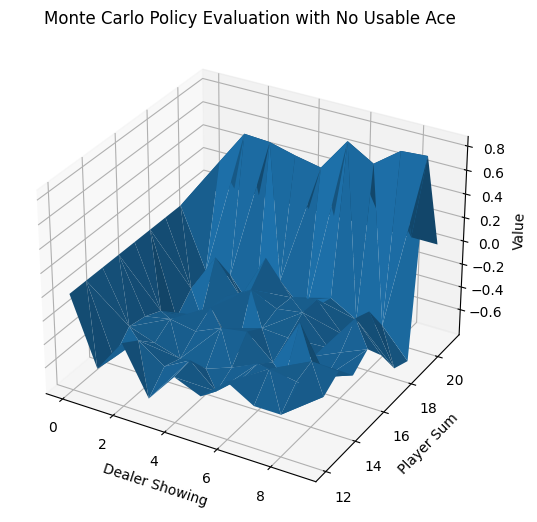

C:\Users\shaks\AppData\Local\Temp\ipykernel_25236\2646883011.py:32: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


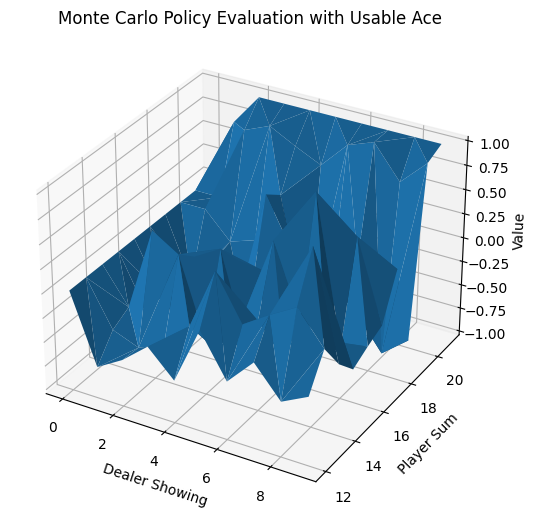

(10, 11)
0.0


C:\Users\shaks\AppData\Local\Temp\ipykernel_25236\2646883011.py:60: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


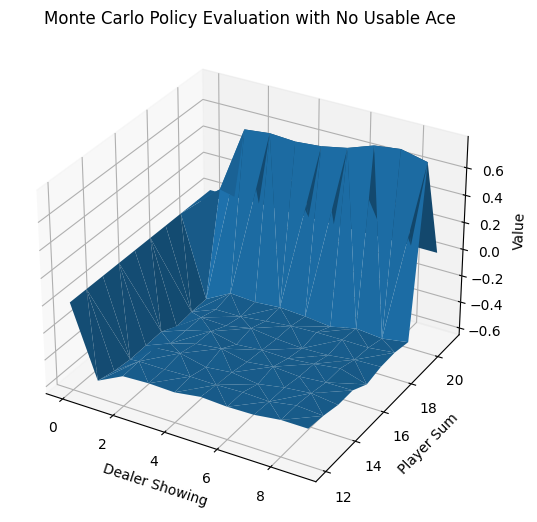

C:\Users\shaks\AppData\Local\Temp\ipykernel_25236\2646883011.py:71: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


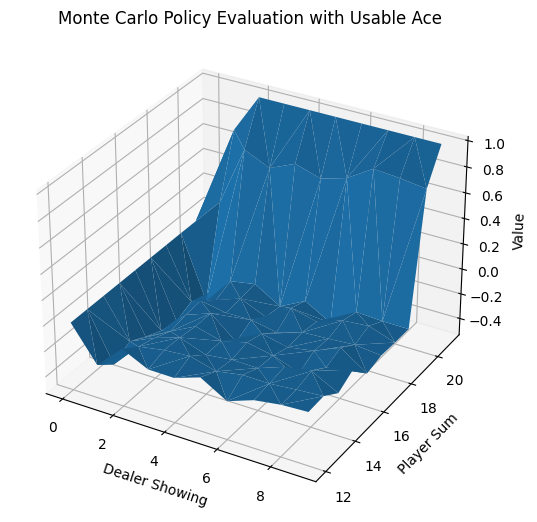

In [241]:
StateVarr = np.array(Vals10k)[12:22,0:12]
AceStateVarr = np.array(ValAces10k)[12:22,0:12]

PlayerSum = []
DealerCard = []
Value = []
ValueAce = []
print(np.shape(StateVarr))
print(StateVarr[8,0])
for i in range(12,22):
    k = i - 12
    for j in range(0,10):
        PlayerSum.append(i)
        DealerCard.append(j)
        Value.append(StateVarr[k,j])
        ValueAce.append(AceStateVarr[k,j])
Y = np.array(PlayerSum)
X = np.array(DealerCard)
Z = np.array(Value)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, Z)
ax.set_xlabel('Dealer Showing')
ax.set_ylabel('Player Sum')
ax.set_zlabel('Value')
plt.title("Monte Carlo Policy Evaluation with No Usable Ace")
plt.show()


ZA = np.array(ValueAce)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, ZA)
ax.set_xlabel('Dealer Showing')
ax.set_ylabel('Player Sum')
ax.set_zlabel('Value')
plt.title("Monte Carlo Policy Evaluation with Usable Ace")
plt.show()

StateVarr = np.array(Vals500k)[12:22,0:12]
AceStateVarr = np.array(ValAces500k)[12:22,0:12]

PlayerSum = []
DealerCard = []
Value = []
ValueAce = []
print(np.shape(StateVarr))
print(StateVarr[8,0])
for i in range(12,22):
    k = i - 12
    for j in range(0,10):
        PlayerSum.append(i)
        DealerCard.append(j)
        Value.append(StateVarr[k,j])
        ValueAce.append(AceStateVarr[k,j])
Y = np.array(PlayerSum)
X = np.array(DealerCard)
Z = np.array(Value)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, Z)
ax.set_xlabel('Dealer Showing')
ax.set_ylabel('Player Sum')
ax.set_zlabel('Value')
plt.title("Monte Carlo Policy Evaluation with No Usable Ace")
plt.show()


ZA = np.array(ValueAce)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, ZA)
ax.set_xlabel('Dealer Showing')
ax.set_ylabel('Player Sum')
ax.set_zlabel('Value')
plt.title("Monte Carlo Policy Evaluation with Usable Ace")
plt.show()

## (b): Implement first-visit Monte-Carlo control with exploring starts (Monte-Carlo ES on page 99). 

Please read the Example 5.1 and reproduce the Figure 5.2

In [242]:
""" CODE HERE YOUR IMPLEMENTATION for Q2-(b) """

def MCpredES(NumEpisodes):
    env = gym.make("Blackjack-v1")
    #Initializing Q and Return
    Qvals = np.zeros((32,11,2))
    QvalsAce = np.zeros((32,11,2))
    Vals = np.zeros((32,11))
    ValsAce = np.zeros((32,11))
    Returns = np.zeros((32,11), dtype= object)
    ReturnsAce = np.zeros((32,11), dtype= object)
    ReturnsQ = np.zeros((32,11,2), dtype= object)
    ReturnsQAce = np.zeros((32,11,2), dtype= object)
    for i in range(32):
        for j in range(11):
            Returns[i,j] = []
    for i in range(32):
        for j in range(11):
            ReturnsAce[i,j] = []
    for i in range(32):
        for j in range(11):
            for k in range(2):
                ReturnsQ[i,j,k] = []
    for i in range(32):
        for j in range(11):
            for k in range(2):
                ReturnsQAce[i,j,k] = []
    #Random Policy
    Policy = np.zeros((32,11,2), dtype=  int)
    for i in range(32):
        for j in range(11):
            for k in range(2):
                Policy[i,j,k] = np.random.randint(0,2)
    
    for episode in range(int(NumEpisodes)):
        state = env.reset()[0]
        start_state = state
        current_sum = state[0]
        episodeDetails = []
        while True:
            if state[2] == True:
                k = 1
            else:
                k = 0
            action = Policy[state[0],state[1],k]
            next_s, reward, done, info, _ = env.step(action)
            episodeDetails.append((state,action,reward))
            if done == True:
                break
            current_sum = next_s[0]
            state = next_s
        #episode return since no discount or transition rewards
        G = reward
        visited = []
        for dets in reversed(episodeDetails):
            G = G + dets[2]
            CurrState = dets[0]
            CurrAction = dets[1]
            if CurrState not in visited:
                visited.append(CurrState)
                #values and returns
                if CurrState[2] == False:
                    Returns[start_state[0],start_state[1]].append(G)
                    ReturnsQ[start_state[0],start_state[1],CurrAction].append(G)
                    Vals[start_state[0],start_state[1]] = np.average(Returns[start_state[0],start_state[1]])
                    Qvals[start_state[0],start_state[1],CurrAction] = np.average(ReturnsQ[start_state[0],start_state[1],CurrAction])
                    bestAction = np.random.choice(np.where(Qvals[CurrState[0],CurrState[1],0] == Qvals[CurrState[0],CurrState[1],0].max())[0])
                    Policy[CurrState[0],CurrState[1],0] = bestAction
                else:
                    ReturnsAce[start_state[0],start_state[1]].append(G)
                    ReturnsQAce[start_state[0],start_state[1],CurrAction].append(G)
                    ValsAce[start_state[0],start_state[1]] = np.average(ReturnsAce[start_state[0],start_state[1]])
                    QvalsAce[start_state[0],start_state[1],CurrAction] = np.average(ReturnsQAce[start_state[0],start_state[1],CurrAction])
                    bestAction = np.random.choice(np.where(QvalsAce[CurrState[0],CurrState[1],1] == QvalsAce[CurrState[0],CurrState[1],1].max())[0])
                    Policy[CurrState[0],CurrState[1],1] = bestAction
        

    return Vals, ValsAce


ValsES500k, ValAcesES500k = MCpredES(500000)


(10, 11)
0.0


C:\Users\shaks\AppData\Local\Temp\ipykernel_25236\2245464339.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


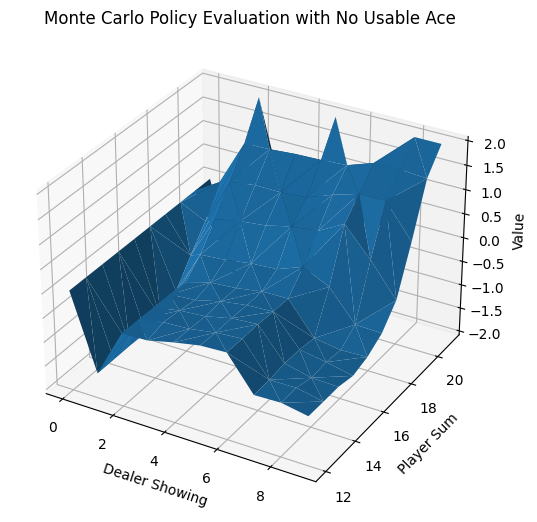

C:\Users\shaks\AppData\Local\Temp\ipykernel_25236\2245464339.py:32: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


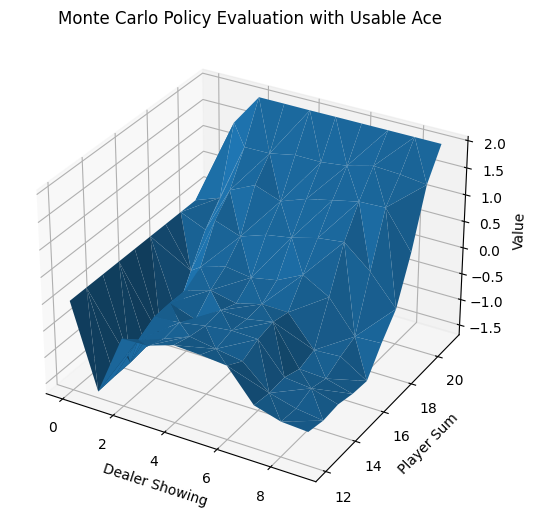

In [243]:
StateVarr = np.array(ValsES500k)[12:22,0:12]
AceStateVarr = np.array(ValAcesES500k)[12:22,0:12]

PlayerSum = []
DealerCard = []
Value = []
ValueAce = []
print(np.shape(StateVarr))
print(StateVarr[8,0])
for i in range(12,22):
    k = i - 12
    for j in range(0,10):
        PlayerSum.append(i)
        DealerCard.append(j)
        Value.append(StateVarr[k,j])
        ValueAce.append(AceStateVarr[k,j])
Y = np.array(PlayerSum)
X = np.array(DealerCard)
Z = np.array(Value)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, Z)
ax.set_xlabel('Dealer Showing')
ax.set_ylabel('Player Sum')
ax.set_zlabel('Value')
plt.title("Monte Carlo Policy Evaluation with No Usable Ace")
plt.show()


ZA = np.array(ValueAce)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, ZA)
ax.set_xlabel('Dealer Showing')
ax.set_ylabel('Player Sum')
ax.set_zlabel('Value')
plt.title("Monte Carlo Policy Evaluation with Usable Ace")
plt.show()

# Q3: Four Rooms, re-visited

In [19]:
"""DO NOT CHANGE"""
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}

        # define the start state
        self.start_state = [0, 0]

        # define the goal state
        self.goal_state = [10, 10]

        # maximal time steps
        self.max_time_steps = 459

        # track the time step
        self.t = 0

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        # reset the agent state to be [0, 0]
        state = self.start_state
        # reset the reward to be 0
        reward = 0
        # reset the termination flag
        done = False
        # reset the time step tracker
        self.t = 0
        return state, reward, done

    def step(self, state, act):
        """
        Args:
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        # Increase the time step
        self.t += 1

        # With probability 0.8, the agent takes the correct direction.
        # With probability 0.2, the agent takes one of the two perpendicular actions.
        # For example, if the correct action is "LEFT", then
        #     - With probability 0.8, the agent takes action "LEFT";
        #     - With probability 0.1, the agent takes action "UP";
        #     - With probability 0.1, the agent takes action "DOWN".
        if np.random.uniform() < 0.2:
            if act == "LEFT" or act == "RIGHT":
                act = np.random.choice(["UP", "DOWN"], 1)[0]
            else:
                act = np.random.choice(["RIGHT", "LEFT"], 1)[0]

        # Compute the next state
        next_state = self.take_action(state, act)

        # Compute the reward
        reward = 1.0 if next_state == [10, 10] else 0.0

        # Check the termination
        # If the agent reaches the goal, reward = 1, done = True
        # If the time steps reaches the maximal number, reward = 0, done = True.
        if next_state == [10, 10] or self.t == self.max_time_steps:
            done = True
        else:
            done = False

        return next_state, reward, done

    def take_action(self, state, act):
        """
        Input args:
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

## (a): Implement first-visit Monte-Carlo control with a epsilon-greedy policy

In [23]:
""" CODE HERE YOUR IMPLEMENTATION for Q3-(a) """
# Implementation of the one-policy first-vist Monte-Carlo control (for ε-soft policies) here.
# To debug your code, you can use run_num = 5 and episode_num = 1e3
# To report the finial results, please use run_num = 10 and episode_num = 1e4

def MCPolicySelector(Epsilon, bestAction):
    action_space = ['LEFT','RIGHT','DOWN','UP']
    if random.random() <= (((1 - Epsilon) + (Epsilon / 4))):
        return(bestAction)
    else:
        action_space.remove(bestAction)
        return(random.choice(action_space))

def FVMC(Gamma, NumEpisodes, Epsilon):
    env = FourRooms()
    action_space = ['LEFT','RIGHT','DOWN','UP']
    #arbitrary soft policy(or random policy since it doesn't make a difference)
    Policy = np.zeros((11,11), dtype = object)
    for i in range(11):
        for j in range(11):
            bestactioN = random.choice(action_space)
            Policy[i][j] = bestactioN

    #initiate Q values
    Qval = np.zeros((11,11,4))
    #Initiating Returns
    Returns = np.zeros((11,11), dtype = object)
    for x in range(11):
        for y in range(11):
            Returns[x][y] = [[],[],[],[]]
    policy = Policy.copy()
    #Episode Return
    G0 = np.zeros(NumEpisodes+1)
    #Episode loop
    for i in range(int(NumEpisodes)):
        #Generate an episode
        state, reward, done = env.reset()
        episodeDeets = []
        while True:
            bestAction = policy[state[0],state[1]]
            action = MCPolicySelector(Epsilon, bestAction)
            next_state, reward, done = env.step(state, action)
            episodeDeets.append((state,action,reward))
            if done == True:
                break
            state = next_state
        #initiate episode return
        G = 0
        #Visited states for first-visit MC control
        visited = []
        for j in reversed(episodeDeets):
            G = (Gamma * G) + j[2]
            CurrState = j[0]
            CurrAction = j[1]
            if CurrState not in visited:
                visited.append(CurrState)
                CAind = action_space.index(CurrAction)
                Returns[CurrState[0],CurrState[1]][CAind].append(G)
                Qval[CurrState[0],CurrState[1],CAind] = np.average(Returns[CurrState[0],CurrState[1]][CAind])
                bestAction = np.random.choice(np.where(Qval[CurrState[0],CurrState[1]] == Qval[CurrState[0],CurrState[1]].max())[0])
                policy[CurrState[0],CurrState[1]] = action_space[bestAction]
        G0[i] = G

    return G0

#Multi trials

def MCpolicy(numTrials, numEpisodes, Epsilon, Gamma):
    G0total = []
    for trials in range(numTrials):
        G0 = FVMC(Gamma, numEpisodes, Epsilon)
        G0total.append(G0)

    return G0total


DiscountedReturnsZero = MCpolicy(5,1000,0,0.9)
DiscountedReturnsZeroZero1 = MCpolicy(5,1000,0.01,0.9)
DiscountedReturnsZero1 = MCpolicy(5,1000,0.1,0.9)
          

<Figure size 640x480 with 0 Axes>

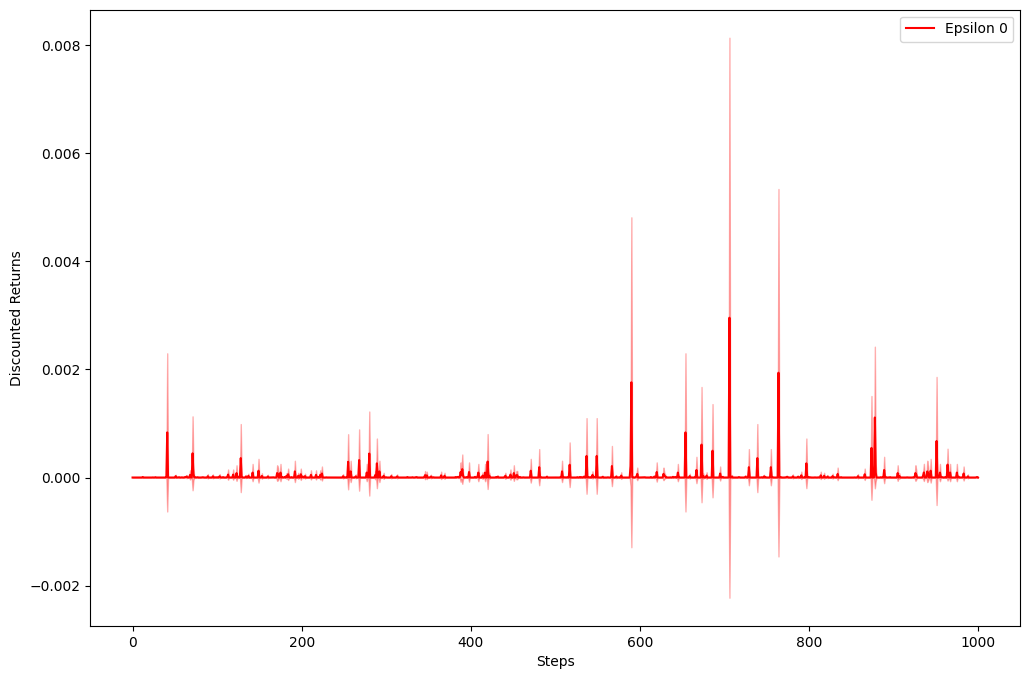

<Figure size 640x480 with 0 Axes>

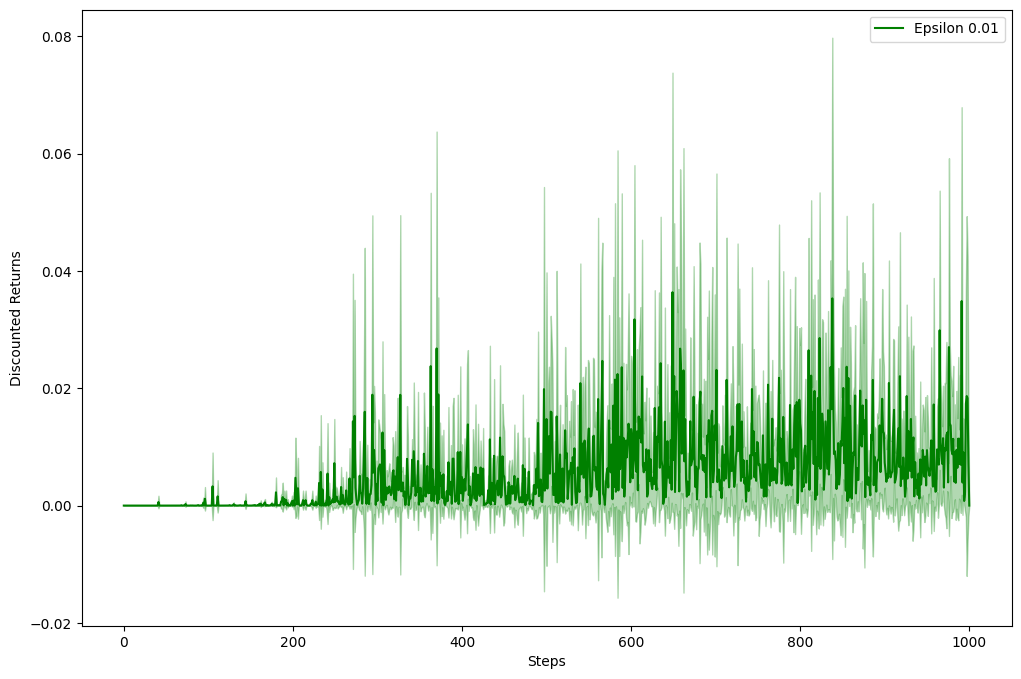

<Figure size 640x480 with 0 Axes>

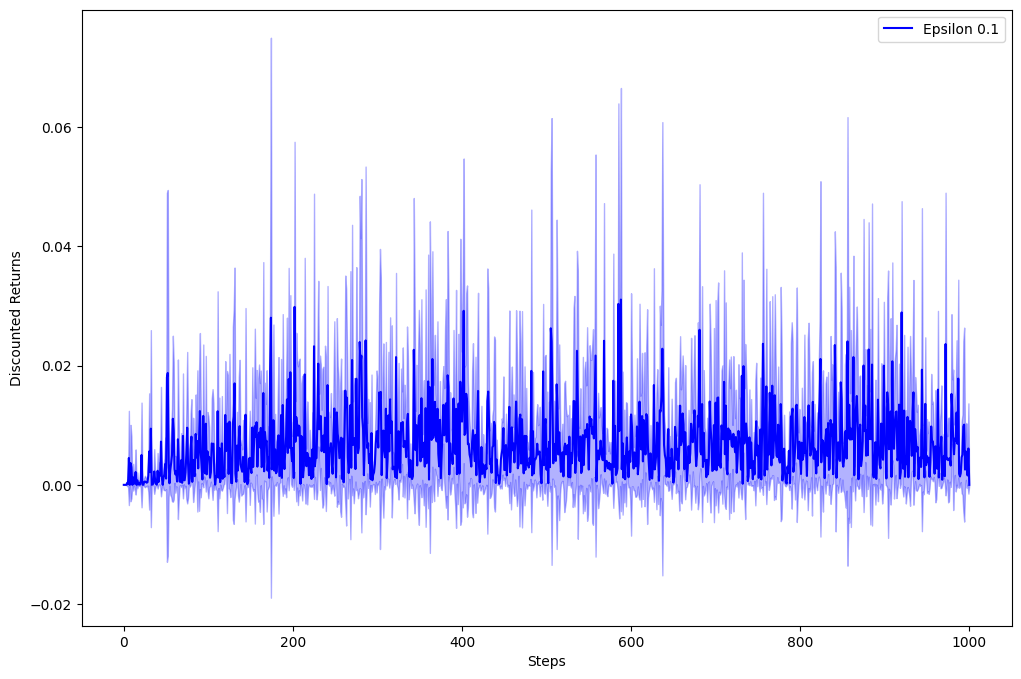

In [24]:
plot_curves(np.array([DiscountedReturnsZero]), ["Epsilon 0"], ["r"], "Discounted Returns")
plot_curves(np.array([DiscountedReturnsZeroZero1]), ["Epsilon 0.01"], ["g"], "Discounted Returns")
plot_curves(np.array([DiscountedReturnsZero1]), ["Epsilon 0.1"], ["b"], "Discounted Returns")



## Q5: Racktrack

Please note, we provde you with the implementation of the two Racetrack domains in the Figure 5.5.

In [4]:
# Define the Racetrack domain 1
racetrack_v1_arr = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]])

racetrack_v2_arr = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

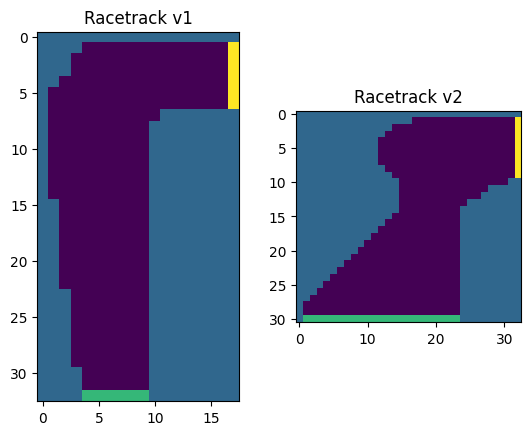

In [5]:
fig, arr = plt.subplots(1, 2)
arr[0].set_title("Racetrack v1")
arr[0].imshow(racetrack_v1_arr)
arr[1].set_title("Racetrack v2")
arr[1].imshow(racetrack_v2_arr)
plt.show()

In [6]:
"""Implementation of the Racetrack environment. Do not change"""
class Racetrack(object):
    def __init__(self, version):
        # Load the pre-defined the domain having the following representation
        #   - 1: track cell
        #   - 0: empty cell
        #   - 2: empty cell on the start line
        #   - 3: empty cell on the finish line
        if version == "v1":
            self.domain_arr = racetrack_v1_arr.copy()
        else:
            self.domain_arr = racetrack_v2_arr.copy()

        # domain size
        self.height, self.width = self.domain_arr.shape

        # State space consists of:
        # Agent location
        self.empty_cell_locs = self.render_cell_locations(val=0.0)
        self.track_cell_locs = self.render_cell_locations(val=1.0)
        self.start_cell_locs = self.render_cell_locations(val=2.0)
        self.finish_cell_locs = self.render_cell_locations(val=3.0)

        # Action space
        self.action_space = [[-1, -1], [-1, 0], [-1, 1],
                             [0, -1], [0, 0], [0, 1],
                             [1, -1], [1, 0], [1, 1]]

        # construct the state space
        self.state_space = []
        for loc in self.start_cell_locs + self.empty_cell_locs + self.finish_cell_locs:
            for i in range(5):
                for j in range(5):
                    self.state_space.append(loc + [i, j])

        # track the agent's location
        self.state = None
        self.action = None
        self.t = None

    def reset(self):
        # randomly select one cell from the start line
        start_loc = random.sample(self.start_cell_locs, 1)[0]
        # reset the velocity to be zero for both x and y directions
        start_vel = [0, 0]
        # the state is a combination of location and velocity
        # for example: [loc_x, loc_y, vel_x, vel_y]
        state = start_loc + start_vel
        # reward
        reward = None
        # done
        done = False
        # track agent's location
        self.state = tuple(state)
        self.t = 0
        return state, reward, done

    def step(self, state, action):
        """
        Args:
            state (list): a list variable consists of agent's location + agent's current velocity. e.g., [x, y, v_x, v_y]
            action (list): a list variable consists of agent's velocity increments. e.g., [increments_v_x, increments_v_y]
        """
        # reward is -1 for every time step until the agent passes the finish line
        reward = -1
        self.t += 1
        
        # with the probability = 0.1, set action = [0, 0]
        if np.random.random() < 0.1:
            action = [0, 0]

        # update the velocity components
        # note that, both velocity is discrete and constraint within [0, 4]
        next_vel_x = np.clip(state[2] + action[0], a_min=0, a_max=4)
        next_vel_y = np.clip(state[3] + action[1], a_min=0, a_max=4)
        next_state_vel = [next_vel_x, next_vel_y]

        # only the cells on the start line can have both 0 velocities
        if next_state_vel == [0, 0]:
            if state not in self.start_cell_locs:
                # non-zero for velocities
                if state[2] == 0 and state[3] != 0:
                    next_state_vel = [0, 1]
                if state[2] != 0 and state[3] == 0:
                    next_state_vel = [1, 0]
                if state[2] != 0 and state[3] != 0:
                    non_zero_idx = random.sample([0, 1], 1)[0]
                    next_state_vel[non_zero_idx] = 1

        # update the next state location based on the updated velocities
        next_state_loc = [np.clip(state[0] + next_state_vel[0], a_min=0, a_max=self.width-1),
                          np.clip(state[1] + next_state_vel[1], a_min=0, a_max=self.height-1)]

        # check whether the agent hits the track
        if next_state_loc in self.track_cell_locs:
            # move back to the start line
            next_state_loc = random.sample(self.start_cell_locs, 1)[0]
            # reduce velocity to be 0s
            next_state_vel = [0, 0]
            # episode continue
            done = False
            # next state
            next_state = next_state_loc + next_state_vel
            return next_state, reward, done

        # check whether the agent pass the finish line
        if next_state_loc in self.finish_cell_locs:
            next_state = next_state_loc + next_state_vel
            done = True
            return next_state, 0, done

        # otherwise combine the next state
        next_state = next_state_loc + next_state_vel
        # termination
        done = False

        # track the agent's state
        self.state = tuple(next_state)
        self.action = action
        return next_state, reward, done

    def render_cell_locations(self, val):
        row_loc_indices, col_loc_indices = np.where(self.domain_arr == val)
        cell_locations = [[c, (self.height-1) - r] for r, c in zip(row_loc_indices, col_loc_indices)]
        return cell_locations

    def render(self):
        plt.clf()
        plt.title(f"s = {self.state}, a = {self.action}")
        plot_arr = self.domain_arr.copy()
        plot_arr[(self.height - 1) - self.state[1], self.state[0]] = 4
        plt.imshow(plot_arr)
        plt.show(block=False)
        plt.pause(0.01)

## (a): Implement first-visit Monte-Carlo control with a epsilon-greedy policy (epsilon = 0.1)
    - Plot the learning curves for the two tracks.
    - Use running trials number = 10 and episodes number = 1e4

In [10]:
""" CODE HERE YOUR IMPLEMENTATION for Q5-(a) """
# Implement here and use the plotting function above to plot the learning curve 
def MCPolicySelector(Epsilon, bestAction):
    action_space = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 0], [0, 1], [1, -1], [1, 0], [1, 1]]
    if random.random() <= (((1 - Epsilon) + (Epsilon / 9))):
        return(bestAction)
    else:
        action_space.remove(bestAction)
        return(random.choice(action_space))


def FVMCRC(version, NumEpisodes, Epsilon, Gamma):
    env = Racetrack(version)
    #Arbitrary soft policy(just random in this case as it doesn't matter)
    trackDimOriginal = np.shape(env.domain_arr)
    trackDim = (trackDimOriginal[1],trackDimOriginal[0])
    Policy = np.zeros((trackDim[0],trackDim[1],5,5), dtype = object)
    for i in range(trackDim[0]):
        for j in range(trackDim[1]):
            for k in range(5):
                for l in range(5):
                    Policy[i][j][k][l] = random.choice(env.action_space)

    policy = Policy.copy()
    #Initiating Qvals
    Qval = np.zeros((trackDim[0],trackDim[1],5,5,9))
    for q in range(trackDim[0]):
        for w in range(trackDim[1]):
            for e in range(5):
                for r in range(5):
                    for t in range(9):
                        Qval[q][w][e][r][t] = 0
    #Initiating Returns
    Returns = np.zeros((trackDim[0],trackDim[1],5,5), dtype = object)
    for q in range(trackDim[0]):
        for w in range(trackDim[1]):
            for e in range(5):
                for r in range(5):
                    Returns[q][w][e][r] = [[],[],[],[],[],[],[],[],[]]
    #Episode Return
    G0 = np.zeros(NumEpisodes)
    #Episode loop
    for ep in range(int(NumEpisodes)):
        #Generate an Episode
        state,reward,done = env.reset()
        episodeDeets = []
        while True:
            bestAction = Policy[state[0],state[1],state[2],state[3]]
            action = MCPolicySelector(Epsilon, bestAction)
            next_state, reward, done = env.step(state, action)
            episodeDeets.append((state,action,reward))
            if done == True:
                break
            state = next_state
        #initiate episode return
        G = 0
        #Visited states for first-visit MC control
        visited = []
        for j in reversed(episodeDeets):
            G = (Gamma*G) + j[2]
            CS = j[0]
            CA = j[1]
            if CS not in visited:
                visited.append(CS)
                CAindex = env.action_space.index(CA)
                Returns[CS[0],CS[1],CS[2],CS[3]][CAindex].append(G)
                Qval[CS[0],CS[1],CS[2],CS[3],CA] = np.average(Returns[CS[0],CS[1],CS[2],CS[3]][CAindex])
        G0[ep] = G
        for i in range(trackDim[0]):
            for j in range(trackDim[1]):
                for k in range(5):
                    for l in range(5):
                        bestAction = np.random.choice(np.where(Qval[i,j,k,l] == Qval[i,j,k,l].max())[0])
                        policy[i,j,k,l] = bestAction
        print(ep)
    return G0

#Multi trials

def MCRCpolicy(version, numTrials, numEpisodes, Epsilon, Gamma):
    G0total = []
    for trials in range(numTrials):
        G0 = FVMCRC(version, numEpisodes, Epsilon, Gamma)
        G0total.append(G0)

    return G0total

G0 = MCRCpolicy("v1", 1, 1000, 0.1, 0.9)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<Figure size 640x480 with 0 Axes>

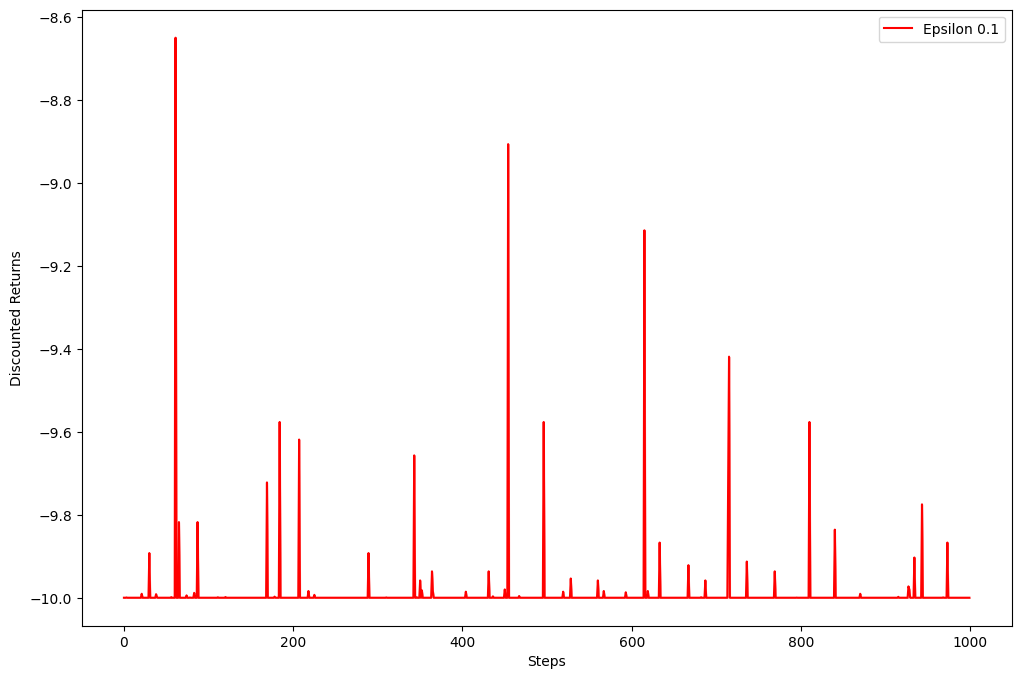

In [9]:
plot_curves(np.array([G0]), ["Epsilon 0.1"], ["r"], "Discounted Returns")

In [16]:
""" CODE HERE YOUR IMPLEMENTATION for Q5-(b) """
# Implement here and use the plotting function above to plot the learning curve 

def MCPolicySelector(Epsilon, bestAction):
    action_space = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 0], [0, 1], [1, -1], [1, 0], [1, 1]]
    if random.random() <= (((1 - Epsilon) + (Epsilon / 9))):
        return(bestAction)
    else:
        action_space.remove(bestAction)
        return(random.choice(action_space))

def OffPolicyMC(version, NumEpisodes, Epsilon, Gamma):
    env = Racetrack(version)
    trackDimOriginal = np.shape(env.domain_arr)
    trackDim = (trackDimOriginal[1],trackDimOriginal[0])
    #Initiating Qvals
    Qval = np.zeros((trackDim[0],trackDim[1],5,5,9))
    for q in range(trackDim[0]):
        for w in range(trackDim[1]):
            for e in range(5):
                for r in range(5):
                    for t in range(9):
                        Qval[q][w][e][r][t] = 0
    #Initiating Cvalues
    Cval = np.zeros((trackDim[0],trackDim[1],5,5,9))
    #Arg max policy
    Policy = np.zeros((trackDim[0],trackDim[1],5,5), dtype = object)
    for i in range(trackDim[0]):
        for j in range(trackDim[1]):
            for k in range(5):
                for l in range(5):
                    actionIndex = np.argmax(Qval[i,j,k,l])
                    Policy[i,j,k,l] = env.action_space[actionIndex]
    
    for ep in range(int(NumEpisodes)):
        #B soft policy
        BPolicy = np.zeros((trackDim[0],trackDim[1],5,5), dtype = object)
        for i in range(trackDim[0]):
            for j in range(trackDim[1]):
                for k in range(5):
                    for l in range(5):
                        BPolicy[i][j][k][l] = random.choice(env.action_space)
        state,reward,done = env.reset()
        episodeDeets = []
        while True:
            bestAction = BPolicy[state[0],state[1],state[2],state[3]]
            action = MCPolicySelector(Epsilon, bestAction)
            next_state, reward, done = env.step(state, action)
            episodeDeets.append((state,action,reward))
            if done == True:
                break
            state = next_state
        #initiate G and W
        G = 0
        W = 1
        #visited state tracker
        visited = []
        for episode in episodeDeets:
            G = (Gamma * G) + episode[2]
            CS = episode[0]
            CA = episode[1]
            CAindex = env.action_space.index(CA)
            Cval[CS[0],CS[1],CS[2],CS[3],CAindex] += W
            Qval[CS[0],CS[1],CS[2],CS[3],CAindex] += ((W / Cval[CS[0],CS[1],CS[2],CS[3],CAindex]) * (G - Qval[CS[0],CS[1],CS[2],CS[3],CAindex]))
            Policy[CS[0],CS[1],CS[2],CS[3]] = env.action_space[np.argmax(Qval[i,j,k,l])]
            if CA != Policy[CS[0],CS[1],CS[2],CS[3]]:
                continue 
            if CA != BPolicy[CS[0],CS[1],CS[2],CS[3]]:
                prob = Epsilon / 9
            else:
                prob = (1 - Epsilon) + (Epsilon / 9)
            W = W * (1 / prob)

        print(ep)

#Multi trials

def OffpolicyTrial(version, numTrials, numEpisodes, Epsilon, Gamma):
    G0total = []
    for trials in range(numTrials):
        G0 = FVMCRC(version, numEpisodes, Epsilon, Gamma)
        G0total.append(G0)

    return G0total

G0 = OffpolicyTrial("v1", 1, 1000, 0.1, 0.9)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<Figure size 640x480 with 0 Axes>

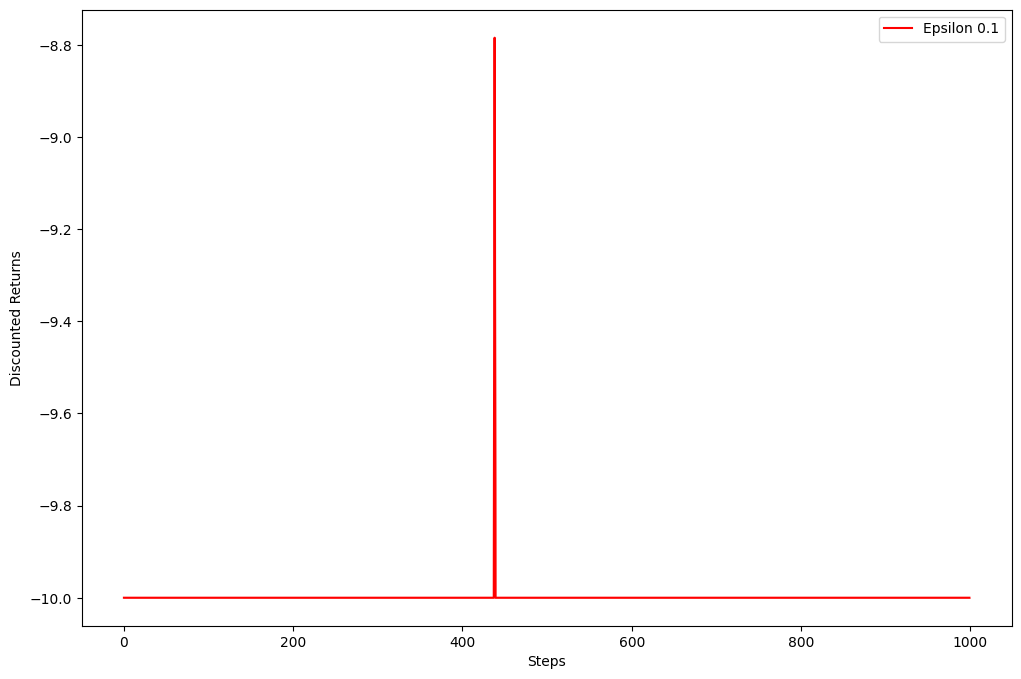

In [17]:
plot_curves(np.array([G0]), ["Epsilon 0.1"], ["r"], "Discounted Returns")

## (b): Implement off-policy Monte-Carlo control. Please specify what behavior policy you are using.
    - Plot the learning curves for the two tracks
    - Using running trials number = 10 and episodes number = 1e4